In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import string


In [2]:
d={chr(i):i for i in range(255)}
c={i:chr(i) for i in range(255)}

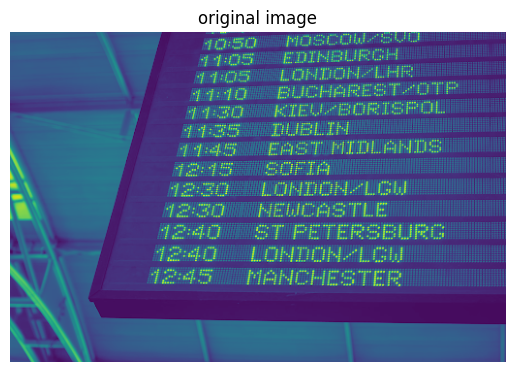

Image shape (Height,Width,Channels): (341, 512, 3)


In [3]:
image_path=r"C:\Users\hp\OneDrive\Desktop\vertex_image.png"
x=cv2.imread(image_path)
#convrt to RGB for matplotlib visualization
x_rgb=cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
#show the original image
plt.imshow(x_rgb)
plt.title('original image')
plt.axis('off')
plt.show()
#Display image shape
print('Image shape (Height,Width,Channels):',x.shape)


In [4]:
key='hellohere'#example a key
text='sweetest'#message to hide
print("key:",key)
print('Text:',text)

key: hellohere
Text: sweetest


In [5]:
#show ascii values of text and key
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print('text ascii:',text_ascii)
print('key ascii:',key_ascii)


text ascii: [115, 119, 101, 101, 116, 101, 115, 116]
key ascii: [104, 101, 108, 108, 111, 104, 101, 114, 101]


In [6]:
#Make a copy of image to modify
x_enc=x.copy()
n,m,z=0,0,0
k1=0
l=len(text)
#Encrypt and modify pixel values
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[k1]]
    x_enc[n,m,z]=new_val
    print(f"Embedding'{text[i]}'(ASCII{d[text[i]]}) XOR '{key[k1]}'(ASCII{d[key[k1]]})={new_val}at pixel ({n},{m},{z})[original={orig_val}]")
    n+=1
    m+=1
    z=(z+1)%3
    m=(m+1)%3 
    k1=(k1+1)%len(key)
    


Embedding's'(ASCII115) XOR 'h'(ASCII104)=27at pixel (0,0,0)[original=111]
Embedding'w'(ASCII119) XOR 'e'(ASCII101)=18at pixel (1,2,1)[original=84]
Embedding'e'(ASCII101) XOR 'l'(ASCII108)=9at pixel (2,1,2)[original=64]
Embedding'e'(ASCII101) XOR 'l'(ASCII108)=9at pixel (3,0,0)[original=112]
Embedding't'(ASCII116) XOR 'o'(ASCII111)=27at pixel (4,2,1)[original=83]
Embedding'e'(ASCII101) XOR 'h'(ASCII104)=13at pixel (5,1,2)[original=60]
Embedding's'(ASCII115) XOR 'e'(ASCII101)=22at pixel (6,0,0)[original=101]
Embedding't'(ASCII116) XOR 'r'(ASCII114)=6at pixel (7,2,1)[original=75]


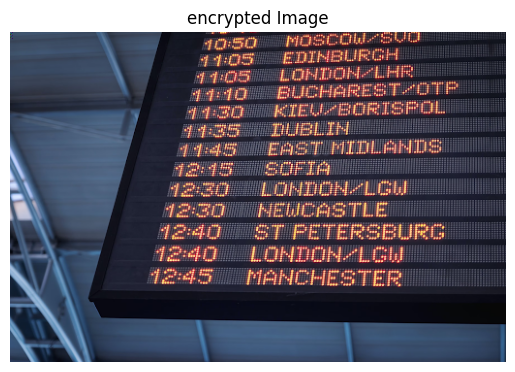

In [7]:
cv2.imwrite('encrypted_img.jpg',x_enc)
#show encrypted image
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("encrypted Image")
plt.axis('off')
plt.show()

In [8]:
#Decrypt
n,m,z=0,0,0
k1=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key[k1]]]
    decrypt+=orig_char
    print(f"Decrypting pixel({n},{m},{z}):{val} XOR {d[key[k1]]}={val^d[key[k1]]}->'{orig_char}'")
    n+=1
    m+=1
    m=(m+1)%3 
    z=(z+1)%3 
    k1=(k1+1)%len(key)
print("Decrypting text:",decrypt)
    

Decrypting pixel(0,0,0):27 XOR 104=115->'s'
Decrypting pixel(1,2,1):18 XOR 101=119->'w'
Decrypting pixel(2,1,2):9 XOR 108=101->'e'
Decrypting pixel(3,0,0):9 XOR 108=101->'e'
Decrypting pixel(4,2,1):27 XOR 111=116->'t'
Decrypting pixel(5,1,2):13 XOR 104=101->'e'
Decrypting pixel(6,0,0):22 XOR 101=115->'s'
Decrypting pixel(7,2,1):6 XOR 114=116->'t'
Decrypting text: sweetest


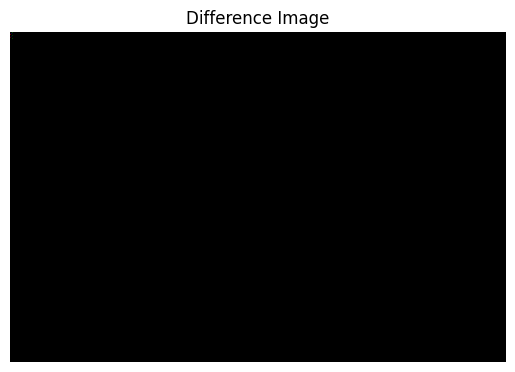

In [9]:
diff = cv2.absdiff(x, x_enc)
plt.imshow(diff)
plt.title("Difference Image")
plt.axis("off")
plt.show()


In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import cv2
import numpy as np

# Load encrypted image
x_enc = cv2.imread("encrypted_img.jpg")
x_pipenc = x_enc.copy()

# ASCII maps
d = {chr(i): i for i in range(255)}
c = {i: chr(i) for i in range(255)}

# GUI functions
def show_enc_image():
    img_rgb = cv2.cvtColor(x_enc, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_tk = ImageTk.PhotoImage(img_pil)
    panel.config(image=img_tk)
    panel.image = img_tk

def decrypt_gui():
    key = key_entry.get()
    try:
        length = int(length_entry.get())
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter a valid message length.")
        return

    result = ""
    n, m, z, k1 = 0, 0, 0, 0
    for i in range(length):
        val = x_pipenc[n, m, z]
        result += c[val ^ d[key[k1]]]
        n += 1
        m = (m + 1) % 3
        z = (z + 1) % 3
        k1 = (k1 + 1) % len(key)

    result_label.config(text="Decrypted: " + result)

# GUI layout
root = tk.Tk()
root.title("Decryption GUI")

tk.Label(root, text="Key:").pack()
key_entry = tk.Entry(root)
key_entry.pack()

tk.Label(root, text="Message Length:").pack()
length_entry = tk.Entry(root)
length_entry.pack()

tk.Button(root, text="Show Encrypted Image", command=show_enc_image).pack()
tk.Button(root, text="Decrypt", command=decrypt_gui).pack()

result_label = tk.Label(root, text="Decrypted: ")
result_label.pack()

panel = tk.Label(root)
panel.pack()

root.mainloop()
